In [1]:
import os
import PIL
from PIL import Image
from helper import resize_func, looking, copy
import preprocessing
import numpy as np
import matplotlib.pyplot as plt

In [2]:
all_images = list()
root_list = list()
files_list = list()

In [3]:
modified_path = 'data'
resize = (16, 16)

In [4]:
for root, dirs, files in os.walk(modified_path):
    for file in files:
        try:
            img = Image.open(os.path.join(root, file))
        except PIL.UnidentifiedImageError:
            print('Not supported PIL format for', os.path.join(root, file), '- this file will be removed')
        resized_img = resize_func(img, *resize)
        img_np = np.asarray(resized_img)
        all_images.append(img_np)
        root_list.append(root)
        files_list.append(file)

Not supported PIL format for data/test/__credits.json - this file will be removed
Not supported PIL format for data/test/aa/requirements.txt - this file will be removed


In [5]:
len(all_images)

58

In [6]:
def plotImage(X):
    plt.figure(figsize=(1.5, 1.5))
    plt.imshow(X)
    plt.show()
    plt.close()

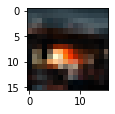

In [7]:
plotImage(all_images[1])

In [8]:
all_images = np.asarray(all_images)

In [9]:
print(all_images)

[[[[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  ...

  [[236 235 234]
   [241 241 240]
   [245 245 244]
   ...
   [236 236 233]
   [230 230 226]
   [227 226 222]]

  [[233 232 229]
   [237 236 234]
   [241 240 238]
   ...
   [243 242 239]
   [240 240 237]
   [238 238 235]]

  [[244 244 242]
   [245 245 243]
   [246 246 244]
   ...
   [251 251 250]
   [250 250 249]
   [249 249 248]]]


 [[[ 39  55  63]
   [ 38  53  62]
   [ 39  54  63]
   ...
   [ 33  50  58]
   [ 32  49  57]
   [ 28  44  52]]

  [[ 55  71  79]
   [ 59  76  83]
   [ 53  69  76]
   ...
   [ 47  65  74]
   [ 47  65  74]
   [ 43  60  69]]

  [[ 58  72  78]
   [ 77  91  96]
   [ 86  96 100]
   ...
   [ 62  80  90]
   [ 62  80  90]
   [ 62  81

In [10]:
all_images.shape

(58, 16, 16, 3)

In [11]:
X = all_images

In [12]:
X = X.reshape(X.shape[0], X.shape[1]*X.shape[2]*X.shape[3])
print(X.shape)

(58, 768)


In [13]:
print(X)

[[  0   0   0 ... 249 249 248]
 [ 39  55  63 ...   2   2   3]
 [180 167 145 ...  96  70  44]
 ...
 [255 255 255 ...  50  40  17]
 [142 169 184 ...  75  69  86]
 [ 36  31  29 ...  38 111 118]]


In [14]:
X_norm = X / 255.
print('X.min()', X_norm.min())
print('X.max()', X_norm.max())

X.min() 0.0
X.max() 1.0


In [15]:
print(X_norm)

[[0.         0.         0.         ... 0.97647059 0.97647059 0.97254902]
 [0.15294118 0.21568627 0.24705882 ... 0.00784314 0.00784314 0.01176471]
 [0.70588235 0.65490196 0.56862745 ... 0.37647059 0.2745098  0.17254902]
 ...
 [1.         1.         1.         ... 0.19607843 0.15686275 0.06666667]
 [0.55686275 0.6627451  0.72156863 ... 0.29411765 0.27058824 0.3372549 ]
 [0.14117647 0.12156863 0.11372549 ... 0.14901961 0.43529412 0.4627451 ]]


In [16]:
X_norm = X_norm - X_norm.mean(axis=0)

In [17]:
cov = np.cov(X_norm, rowvar=False)

In [18]:
print(cov)

[[0.10610433 0.09130678 0.08556076 ... 0.04391058 0.03927089 0.03735326]
 [0.09130678 0.09865294 0.09522425 ... 0.0439497  0.04398973 0.03974883]
 [0.08556076 0.09522425 0.0956219  ... 0.04100473 0.04206918 0.0378456 ]
 ...
 [0.04391058 0.0439497  0.04100473 ... 0.09395906 0.08634813 0.08082665]
 [0.03927089 0.04398973 0.04206918 ... 0.08634813 0.08778529 0.0825597 ]
 [0.03735326 0.03974883 0.0378456  ... 0.08082665 0.0825597  0.08552621]]


In [19]:
cov.shape

(768, 768)

In [20]:
U,S,V = np.linalg.svd(cov)

In [21]:
print (U.shape, S.shape)

(768, 768) (768,)


In [22]:
print(np.diag(S))
print('\nshape:', np.diag(S).shape)

[[2.82803724e+01 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 7.09916255e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 3.74669192e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 2.71851690e-15
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  1.58018921e-15 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.25419976e-15]]

shape: (768, 768)


In [23]:
epsilon = 0.1
X_ZCA = U.dot(np.diag(1.0/np.sqrt(S + epsilon))).dot(U.T).dot(X_norm.T).T

In [24]:
X_ZCA.shape

(58, 768)

In [25]:
X_ZCA

array([[-0.08999778, -0.08550067, -0.10725432, ...,  0.20481568,
         0.21535656,  0.25686849],
       [-0.21987148, -0.11976806, -0.08364736, ..., -0.21761806,
        -0.16301765, -0.17756534],
       [ 0.1726985 ,  0.09058686,  0.01089139, ..., -0.09261114,
        -0.1465884 , -0.24945473],
       ...,
       [ 0.42245653,  0.55659707,  0.58372245, ..., -0.20554207,
        -0.15975063, -0.27483765],
       [-0.27987725, -0.14376518,  0.00913874, ..., -0.31113469,
        -0.2823538 , -0.14770129],
       [-0.15616913, -0.24623888, -0.22161624, ..., -0.29658578,
         0.18034176,  0.26553539]])

In [ ]:
plotImage(X_ZCA[1, :])

In [ ]:
plotImage(X_ZCA_rescaled[2, :])

In [26]:
X_ZCA_rescaled = (X_ZCA - X_ZCA.min()) / (X_ZCA.max() - X_ZCA.min())

In [27]:
X_ZCA_rescaled.shape

(58, 768)

TypeError: Invalid shape (768,) for image data

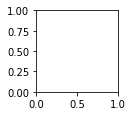

In [28]:
plotImage(X[2, :])

In [ ]:
X = X.reshape(3, 16, 16, 3)

In [ ]:
X_ZCA = X_ZCA.reshape(58, 16, 16, 3)

In [ ]:
X_ZCA_rescaled = X_ZCA_rescaled.reshape(58, 16, 16, 3)

In [ ]:
plotImage(X_ZCA_rescaled[1])

In [ ]:
pil_image = Image.fromarray((X_ZCA_rescaled[1] * 255).astype(np.uint8))

In [ ]:
pil_image.save('a.jpg')